# Census Income Project


Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: 

((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Census.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# EDA 

<AxesSubplot:xlabel='Age', ylabel='Income'>

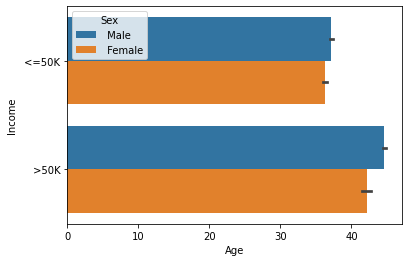

In [6]:
sns.barplot(data = df, x = 'Age', y = 'Income', hue = 'Sex')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

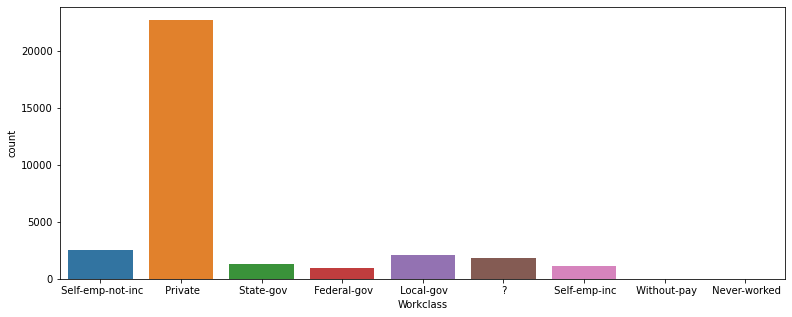

In [7]:
plt.figure(figsize=(13,5))
sns.countplot(df['Workclass'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

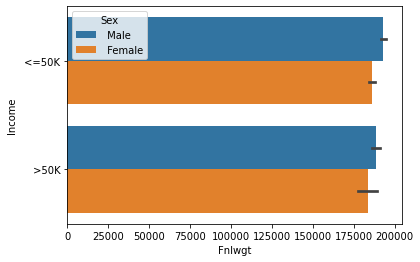

In [8]:
sns.barplot(data = df, x = 'Fnlwgt', y = 'Income', hue = 'Sex')

<AxesSubplot:xlabel='Education', ylabel='count'>

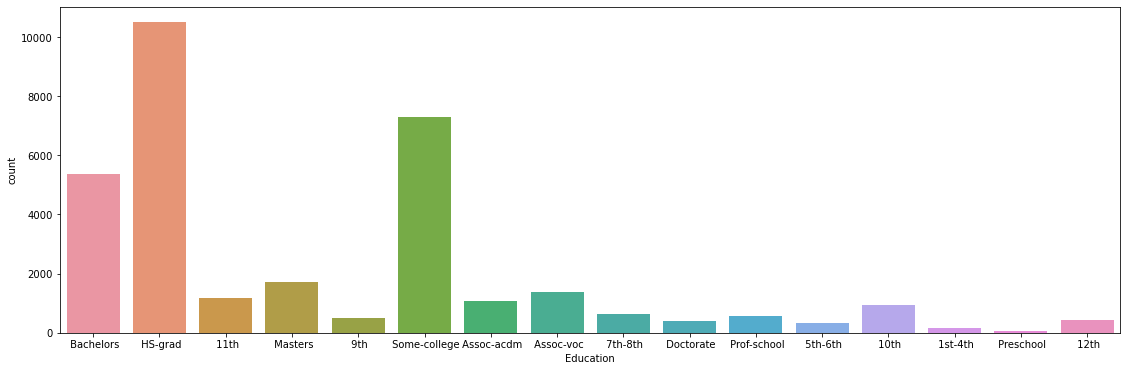

In [9]:
plt.figure(figsize=(19,6))
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='count'>

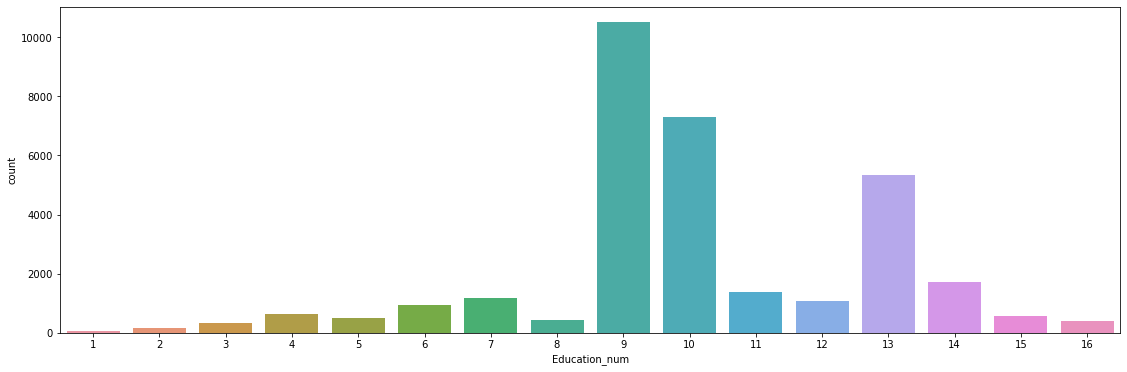

In [10]:
plt.figure(figsize=(19,6))
sns.countplot(df['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

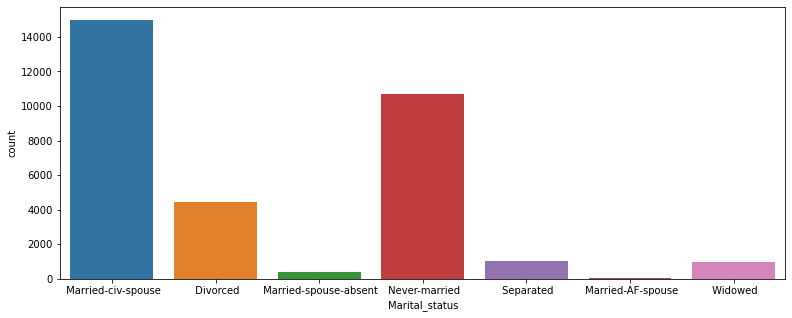

In [11]:
plt.figure(figsize=(13,5))
sns.countplot(df['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

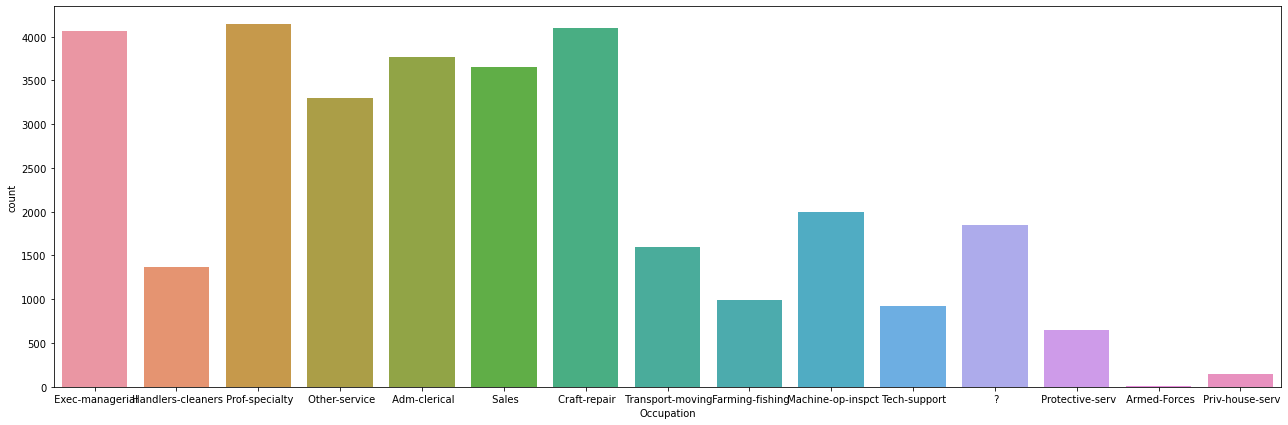

In [12]:
plt.figure(figsize=(22,7))
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='count'>

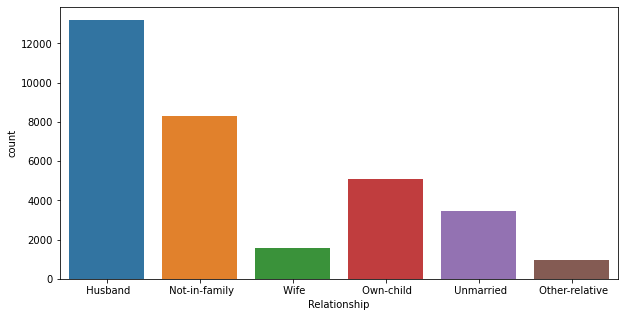

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='count'>

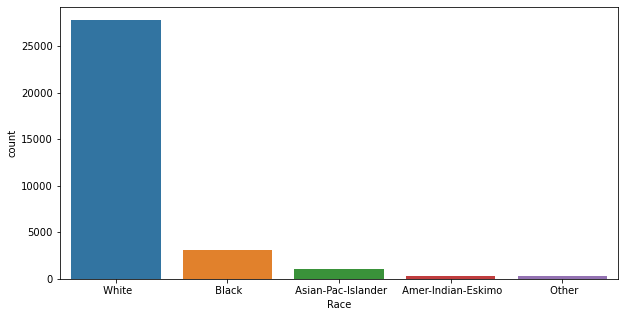

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df['Race'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

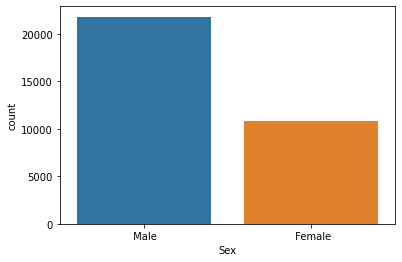

In [15]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

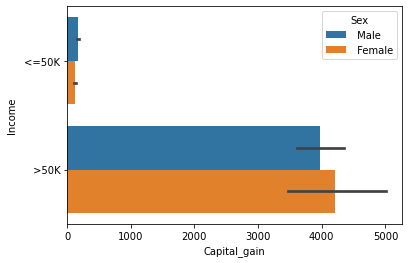

In [16]:
sns.barplot(data = df, x = 'Capital_gain', y = 'Income', hue = 'Sex')

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

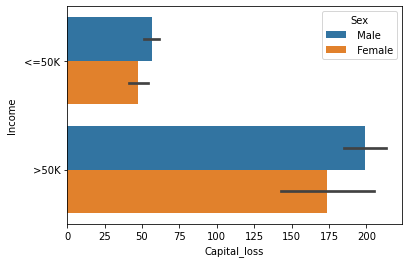

In [17]:
sns.barplot(data = df, x = 'Capital_loss', y = 'Income', hue = 'Sex')

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

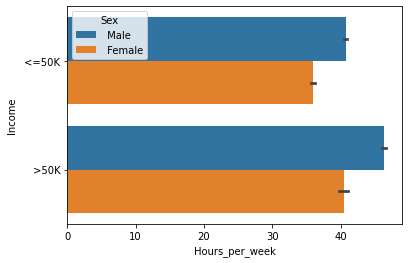

In [18]:
sns.barplot(data = df, x = 'Hours_per_week', y = 'Income', hue = 'Sex')

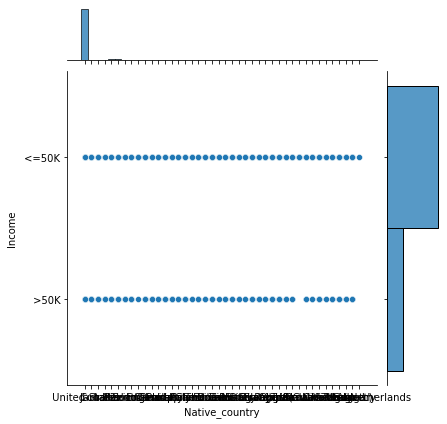

In [19]:
sns.jointplot(data = df, x = 'Native_country', y = 'Income')

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39,0
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39,1
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39,0
32558,5,4,12880,11,8,4,1,3,4,1,0,0,19,39,0


# Correlation

In [21]:
df.corr().sum()

Age               1.010970
Workclass         1.534855
Fnlwgt            0.789442
Education         1.508765
Education_num     2.169947
Marital_status    0.043513
Occupation        1.514993
Relationship     -0.706124
Race              1.321703
Sex               1.217582
Capital_gain      1.688306
Capital_loss      1.323531
Hours_per_week    1.696025
Native_country    1.158478
Income            2.353562
dtype: float64

<AxesSubplot:>

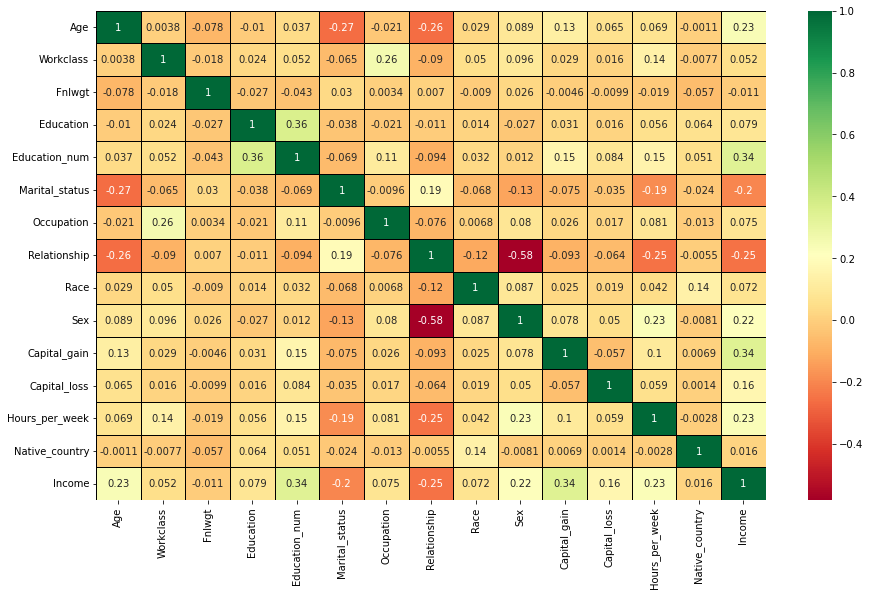

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Fnlwgt             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education         AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Marital_status       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Occupation        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Relationship       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_gain            AxesSubplot(0.125,0.125;0.133621x0.222059)
Capital_loss         AxesSubplot(0.285345,0.125;0.133621x0.222059)
Hours_per_week        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.606034,0.125;0.133621x0.222059)
Income               AxesSubplot(0.766379,0.125;0.133621x0.222

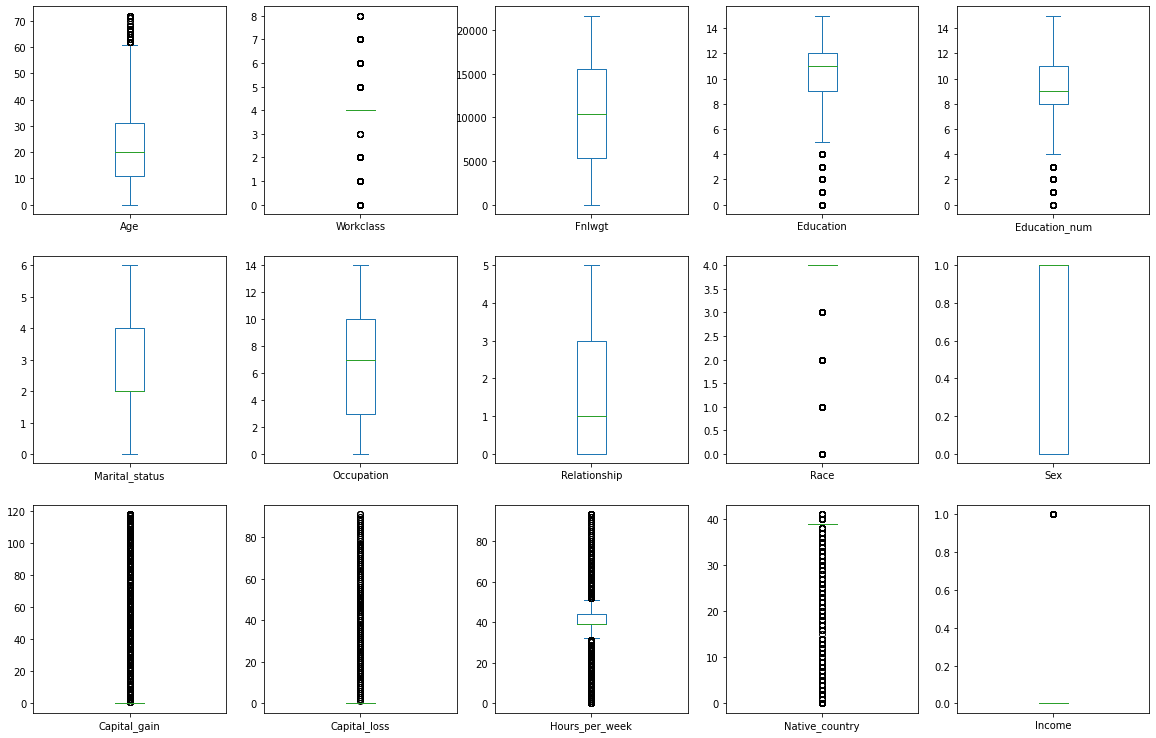

In [23]:
df.plot(kind = 'box', subplots = True, layout = (3,5), figsize = (20,13))

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df.shape

(32560, 15)

In [25]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(26735, 15)

In [26]:
loss = ((32560 - 26795)/32560)*100
loss

17.705773955773957

# Skewness

In [27]:
df1.skew()

Age               0.512903
Workclass        -0.746686
Fnlwgt            0.042344
Education        -0.953893
Education_num    -0.150206
Marital_status   -0.086741
Occupation        0.136047
Relationship      0.709768
Race             -2.524414
Sex              -0.649131
Capital_gain      6.044493
Capital_loss      9.786982
Hours_per_week   -0.382335
Native_country   -5.338005
Income            1.577615
dtype: float64

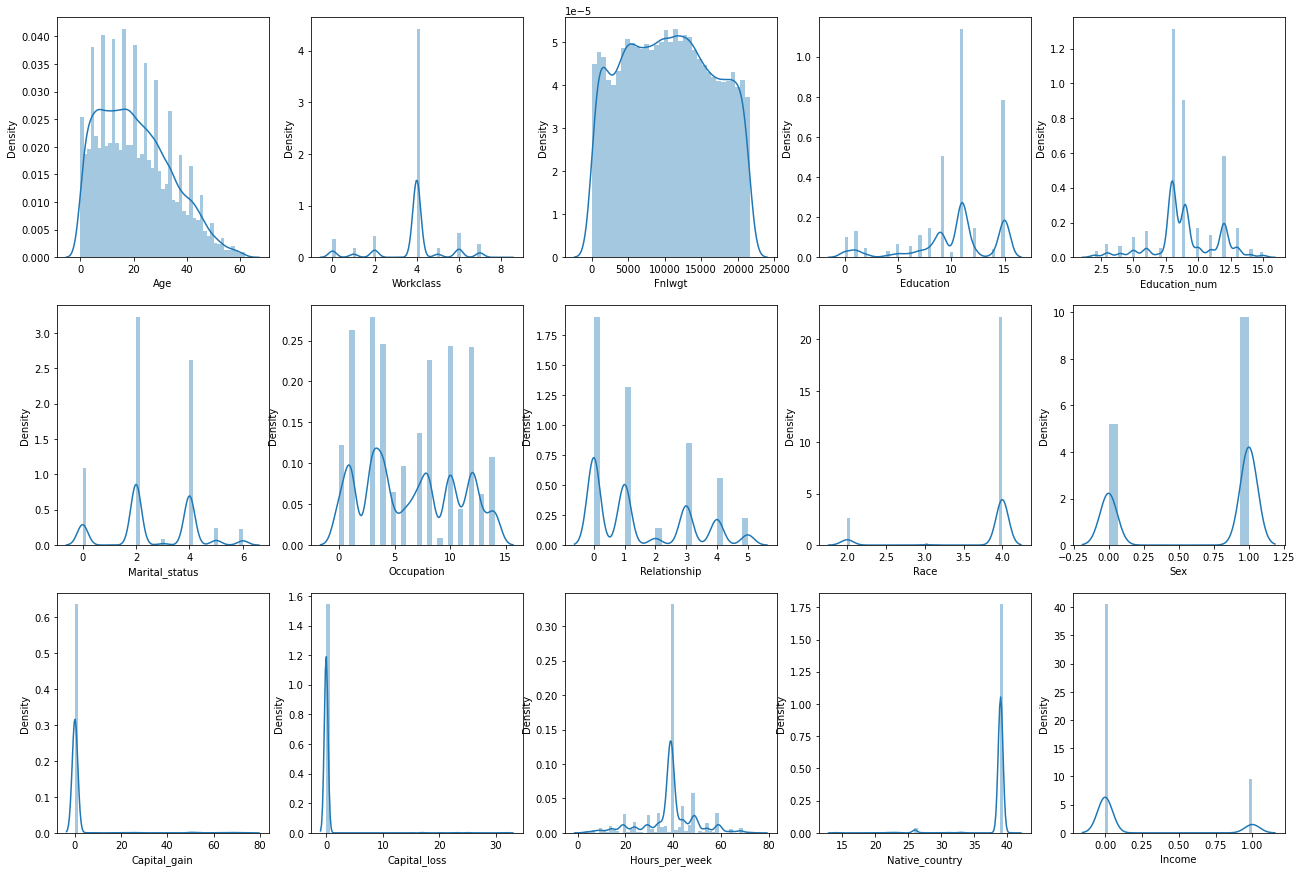

In [28]:
plt.figure(figsize=(22,15))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(3,5,i)
    sns.distplot(df1[column])

In [29]:
df1.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000,26735.000000
mean,20.769815,3.857528,10585.974864,10.315915,8.973667,2.637629,6.523509,1.501066,3.783841,0.654348,1.617767,0.274023,38.670095,38.449635,0.190350
std,13.394953,1.448298,6051.187283,3.923054,2.385474,1.537143,4.252288,1.598277,0.615193,0.475589,9.303481,2.526678,11.138166,2.779831,0.392584
min,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,14.000000,0.000000
25%,10.000000,4.000000,5475.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,19.000000,4.000000,10518.000000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,30.000000,4.000000,15561.500000,12.000000,10.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,62.000000,8.000000,21646.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,76.000000,32.000000,75.000000,41.000000,1.000000


In [30]:
X = df1.drop(['Income'], axis = 1)
Y = df1['Income']

In [31]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 0.93192742,  1.66091865, -1.29229575, ..., -0.11550725,
        -2.19297782,  0.17673997],
       [ 0.17805827,  0.02204012,  0.61951201, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.09917956,  0.02204012,  0.79642332, ..., -0.11550725,
        -0.01830135,  0.17673997],
       ...,
       [ 0.31543197,  0.02204012, -0.30756009, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [ 1.36405656,  0.02204012, -0.34085134, ..., -0.11550725,
        -0.01830135,  0.17673997],
       [-1.28036754,  0.02204012,  0.4446004 , ..., -0.11550725,
        -1.70348545,  0.17673997]])

# Scaling data

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Balancing imbalanced target

In [33]:
Y.value_counts()

0    21646
1     5089
Name: Income, dtype: int64

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts() 

0    21646
1    21646
Name: Income, dtype: int64

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=None)
cvs.mean()

[[3155 1167]
 [ 883 3454]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4322
           1       0.75      0.80      0.77      4337

    accuracy                           0.76      8659
   macro avg       0.76      0.76      0.76      8659
weighted avg       0.76      0.76      0.76      8659

0.7632521076336759


0.7609950841155368

In [38]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv=None)
cvs.mean()

[[3766  556]
 [  44 4293]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      4322
           1       0.89      0.99      0.93      4337

    accuracy                           0.93      8659
   macro avg       0.94      0.93      0.93      8659
weighted avg       0.94      0.93      0.93      8659

0.9307079339415637


0.9354154033216281

In [39]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv=None)
cvs.mean()

[[3711  611]
 [  63 4274]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      4322
           1       0.87      0.99      0.93      4337

    accuracy                           0.92      8659
   macro avg       0.93      0.92      0.92      8659
weighted avg       0.93      0.92      0.92      8659

0.9221619124610232


0.926222189035447

In [40]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv=None)
cvs.mean()

[[3236 1086]
 [ 478 3859]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4322
           1       0.78      0.89      0.83      4337

    accuracy                           0.82      8659
   macro avg       0.83      0.82      0.82      8659
weighted avg       0.83      0.82      0.82      8659

0.8193786811410093


0.8165712880345055

In [41]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=None)
cvs.mean()

[[3279 1043]
 [ 289 4048]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4322
           1       0.80      0.93      0.86      4337

    accuracy                           0.85      8659
   macro avg       0.86      0.85      0.84      8659
weighted avg       0.86      0.85      0.84      8659

0.8461716133502714


0.8464614187330437

# Hyperparameter tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(35, 900, 10)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 300, 400]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "criterion" : ['gini', 'entropy']}
print(random_grid)

{'n_estimators': [10, 108, 207, 306, 405, 504, 603, 702, 801, 900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [35, 131, 227, 323, 419, 515, 611, 707, 803, 900], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 300, 400], 'criterion': ['gini', 'entropy']}


In [44]:
rf = RandomForestClassifier()
rfcv = RandomizedSearchCV(estimator = rf, 
                          param_distributions= random_grid, 
                          cv = 5, 
                          verbose = 2, 
                          random_state=100, 
                          n_jobs = -1)

#fitting
rfcv.fit(X_train, Y_train)
rfcv

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [35, 131, 227, 323, 419,
                                                      515, 611, 707, 803, 900],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 300, 400],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 108, 207, 306, 405,
                                                         504, 603, 702, 801,
                                                         900]},
                   random_state=100, verbose=2)

In [45]:
rfcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=611, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=900)

In [46]:
best_rfcv = rfcv.best_estimator_
pred = best_rfcv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))

#Cross Validation
cvs = cross_val_score(rfcv, X, Y, cv=10)
cvs.mean()

[[3345  977]
 [ 413 3924]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4322
           1       0.80      0.90      0.85      4337

    accuracy                           0.84      8659
   macro avg       0.85      0.84      0.84      8659
weighted avg       0.85      0.84      0.84      8659

0.8394733802979559
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.846137894867687

In [47]:
import pickle
filename = 'Census Income.pkl'
pickle.dump(rf, open(filename, 'wb'))